20_neda_mimfpt_(ML_GrdBR)

Engin Abdan

### Libraries

In [23]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

### Data

In [2]:
stu = pd.read_excel("std_ins_ml_data.xlsx")

In [3]:
stu.head(1)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap


In [4]:
drop_list = ["Unnamed: 0", "Plt_Or_Not","MI_Cat"]
stu.drop(drop_list, inplace=True, axis=1)
stu.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Flight_Mean
0,20,19,10,16,13,16,17,22,95


### Data infos

In [5]:
stu.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.0,17.72,3.068511,11.0,16.00,17.0,20.0,26.0
Math_Int,100.0,17.75,3.655285,10.0,15.00,17.0,19.0,33.0
Spa_Int,100.0,17.81,3.047420,10.0,15.75,17.5,20.0,26.0
Mus_Int,100.0,17.86,3.110815,10.0,16.00,17.5,20.0,26.0
Nat_Int,100.0,18.16,3.740901,10.0,15.75,18.0,20.0,33.0
Body_Int,100.0,17.20,2.670452,10.0,15.00,17.0,19.0,23.0
Interp_Int,100.0,17.78,2.865962,12.0,16.00,18.0,19.0,26.0
Intrap_Int,100.0,18.07,2.875374,13.0,16.00,18.0,20.0,26.0
Flight_Mean,100.0,75.00,12.092238,55.0,63.75,75.0,86.0,98.0


### Skewness

In [6]:
x = stu.drop(columns=["Flight_Mean"]).columns
for i in x:
    if skew(stu[i]) >= -0.5 and skew(stu[i]) < 0.5:
        print(f"{i} \t: {skew(stu[i])} \t>>> Normal")
    elif skew(stu[i]) >= 0.5 and skew(stu[i]) < 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Moderate")
    elif skew(stu[i]) >= 1.0:
        print(f"{i} \t: {skew(stu[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [7]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [8]:
#sns.pairplot(stu,hue="Flight_Mean");

### Corr With Plt_Or_Not

<AxesSubplot:>

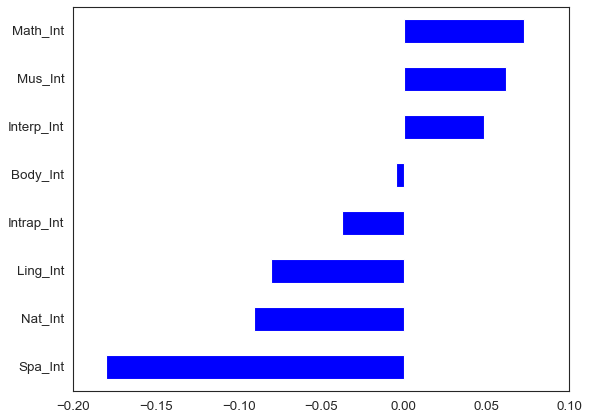

In [24]:
stu.corr()["Flight_Mean"].drop("Flight_Mean").sort_values().plot.barh()

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

x = stu.drop(columns=["Flight_Mean"], axis=1)
y = stu["Flight_Mean"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Train features shape : ", x_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", x_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (70, 8)
Train target shape   :  (70,)
Test features shape  :  (30, 8)
Test target shape    :  (30,)


### GrdR Model

In [11]:
model = GradientBoostingRegressor(random_state=42)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("r2\t:", r2)
print("rmse\t:", rmse)

r2	: -0.2802098114148417
rmse	: 13.20951077218596


### GrdR & CV

In [12]:
model = GradientBoostingRegressor(random_state=42)

scores = cross_validate(model,
                        x_train,
                        y_train,
                        scoring=['r2', 'neg_root_mean_squared_error'],
                        cv =5)
df_scores = pd.DataFrame(scores)
print(df_scores.mean()[2:])
print("----------------------------------------------------------------")
df_scores[["r2", "rmse"]] = df_scores[["test_r2", "test_neg_root_mean_squared_error"]]
df_scores[["r2", "rmse"]]

test_r2                             -0.648674
test_neg_root_mean_squared_error   -14.486497
dtype: float64
----------------------------------------------------------------


,r2,rmse
0,-0.475444,-12.784779
1,-1.154588,-16.519570
2,-0.297476,-14.276422
3,-0.634002,-15.812780
4,-0.681861,-13.038934


### GrdR & GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV
model = GradientBoostingRegressor(random_state=42)

In [14]:
param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.8, 1],
              "max_features" : [None, 2, 3, 4],
              "learning_rate": [0.001, 0.01, 0.1, 0.5],
              "max_depth":[2,3]}

In [15]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)

In [16]:
grid_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [2, 3], 'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='r2')

In [17]:
grid_model.best_estimator_

GradientBoostingRegressor(learning_rate=0.001, n_estimators=200,
                          random_state=42, subsample=0.8)

In [18]:
grid_model.best_params_

{'learning_rate': 0.001,
 'max_depth': 3,
 'max_features': None,
 'n_estimators': 200,
 'subsample': 0.8}

In [19]:
y_train_pred = grid_model.predict(x_train)
y_test_pred = grid_model.predict(x_test)

In [20]:
r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("r2\t:", r2)
print("rmse\t:", rmse)

r2	: 0.11533213585959068
rmse	: 11.292323391162016


In [21]:
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("r2\t:", r2)
print("rmse\t:", rmse)

r2	: -0.0899402055263343
rmse	: 12.188422333040752


### Best Number of "n_estimators"

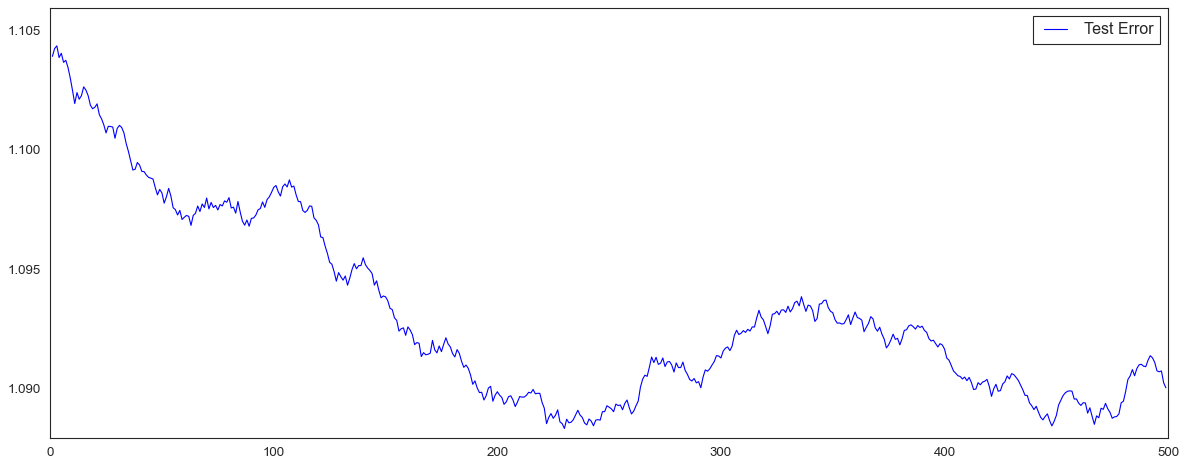

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

test_error = []

for n in range(1,500):
    model = GradientBoostingRegressor(n_estimators=n,
                                      max_depth=3,
                                      max_features=None,
                                      subsample=0.8,
                                      learning_rate=0.001,
                                      random_state=42)
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    test_error.append(1-r2_score(y_test, y_test_pred))

plt.figure(figsize=(15,6))
plt.plot(range(1,500), test_error, label='Test Error')
plt.legend()
plt.tight_layout();

In [35]:
# r2 and rmse With Best Parameters
model = GradientBoostingRegressor(n_estimators=200,
                                  max_depth=3,
                                  max_features=None,
                                  subsample=0.8,
                                  learning_rate=0.001,
                                  random_state=42)
model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=200,
                          random_state=42, subsample=0.8)

In [36]:
y_train_pred = model.predict(x_train)
r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("r2\t:", r2)
print("rmse\t:", rmse)

r2	: 0.11533213585959068
rmse	: 11.292323391162016


In [37]:
y_test_pred = model.predict(x_test)
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("r2\t:", r2)
print("rmse\t:", rmse)

r2	: -0.0899402055263343
rmse	: 12.188422333040752


In [38]:
# r2 and rmse With Default Parameters
model = GradientBoostingRegressor(random_state=42)
model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [39]:
y_train_pred = model.predict(x_train)
r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("r2\t:", r2)
print("rmse\t:", rmse)

r2	: 0.9554210566520884
rmse	: 2.5348838607318083


In [40]:
y_test_pred = model.predict(x_test)
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("r2\t:", r2)
print("rmse\t:", rmse)

r2	: -0.2802098114148417
rmse	: 13.20951077218596


### Feature Importances

In [41]:
model = GradientBoostingRegressor(random_state=42)
model.fit(x_train, y_train)

Feat_Imp = pd.DataFrame(index = x.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
Feat_Imp

,Feat_Imp
Mus_Int,0.070625
Interp_Int,0.072974
Intrap_Int,0.075854
Ling_Int,0.095937
Body_Int,0.160048
Math_Int,0.161182
Spa_Int,0.177936
Nat_Int,0.185444


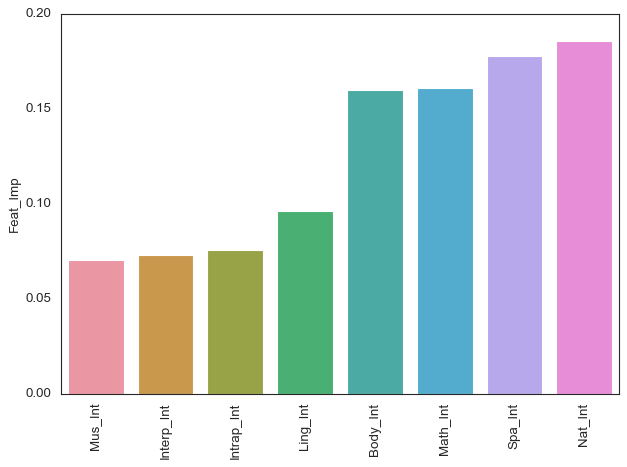

In [42]:
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout()

### Prediction

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
model.fit(x, y)

GradientBoostingRegressor(random_state=42)

In [47]:
columns_name = x.columns

In [48]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [49]:
predictions = round(model.predict(pred_data)[0], 1)
predictions

68.4

In [50]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Flight_Score = predictions

if Flight_Score >= 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Pilot")
if Flight_Score < 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Not Pilot")

MI_Cat		: Mus_Int
MI_Score	: 37
Flight_Score	: 68.4
Result		: Not Pilot
